# NEWS_API
### Welcome to news_api project :)  in this project we'll gain some insight and knowledge about news

In [1]:
# necessary downloading

In [7]:
!pip install newsapi-python
!pip install nltk

importing some necesarry libraries

In [43]:
import pandas as pd #data preprocessing
from newsapi import NewsApiClient #to use api
from IPython.display import JSON #display json
from  config import NEW_API # importing api keys from config file
#plotting and cleaning text libraries
import nltk
from nltk.corpus import stopwords #text processing
from wordcloud import WordCloud #plotting words
import matplotlib.pyplot as plt
from collections import Counter
import string
import numpy as np # linear algebra
import re
from sklearn.feature_extraction.text import TfidfVectorizer # for vektorizing text
from sklearn.model_selection import train_test_split # splitting dataframe
from sklearn.ensemble import RandomForestClassifier # random forest modeling
from sklearn.metrics import accuracy_score, classification_report # useful metrics
from imblearn.over_sampling import RandomOverSampler # for equal outcome
from sklearn.pipeline import Pipeline # to create pipeline


# data collecting

In [9]:
newsapi=NewsApiClient(api_key=NEW_API) # using Client to use api
top_headlines=newsapi.get_top_headlines(q="bitcoin",sources="bbc-news,the-verge",
                                        language="en")

In [10]:
sources=newsapi.get_sources() #get source from api

In [ ]:
sources["sources"]

In [12]:
#checking parsing data what will show you

In [13]:
data=[]
for source in sources["sources"]:
  id=source["id"]
  name=source["name"]
  description=source["description"]
  url=source["url"]
  kategori=source["category"]
  language=source["language"]
  country=source["country"]

  data.append({"name":name,"id":id,"description":description,"url":url,"kategori":kategori,"language":language,"country":country})
df=pd.DataFrame(data)
df


,name,id,description,url,kategori,language,country
0,ABC News,abc-news,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,ABC News (AU),abc-news-au,"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,Aftenposten,aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,Al Jazeera English,al-jazeera-english,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ANSA.it,ansa,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it
...,...,...,...,...,...,...,...
123,Wired,wired,"Wired is a monthly American magazine, publishe...",https://www.wired.com,technology,en,us
124,Wired.de,wired-de,Wired reports on how emerging technologies aff...,https://www.wired.de,technology,de,de
125,Wirtschafts Woche,wirtschafts-woche,Das Online-Portal des führenden Wirtschaftsmag...,http://www.wiwo.de,business,de,de
126,Xinhua Net,xinhua-net,"中国主要重点新闻网站,依托新华社遍布全球的采编网络,记者遍布世界100多个国家和地区,地方频...",http://xinhuanet.com/,general,zh,zh


# EDA

In [ ]:
df.head()

,name,id,description,url,kategori,language,country
0,ABC News,abc-news,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,ABC News (AU),abc-news-au,"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,Aftenposten,aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,Al Jazeera English,al-jazeera-english,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ANSA.it,ansa,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         128 non-null    object
 1   id           128 non-null    object
 2   description  128 non-null    object
 3   url          128 non-null    object
 4   kategori     128 non-null    object
 5   language     128 non-null    object
 6   country      128 non-null    object
dtypes: object(7)
memory usage: 7.1+ KB


In [38]:
#crearting workflow
def json_to_dataframe(api_key):
  """
  convert given json to dataframe
  :param api_key :string indicate

  this method use your api_key and collect sources from api.
  """
  newsapi=NewsApiClient(api_key=api_key)
  top_headlines=newsapi.get_top_headlines(q="bitcoin",sources="bbc-news,the-verge",language="en")
  sources=newsapi.get_sources()
  # parsing data
  data=[]
  for source in sources["sources"]:
    id=source["id"]
    name=source["name"]
    category=source["category"]
    description=source["description"]
    country=source["country"]
    language=source["language"]
    url=source["url"]
    # append parsing data to list
    data.append({"id":id,"name":name,"category":category,"description":description,"country":country,"language":language,"url":url})
  df=pd.DataFrame(data)
  return df

In [39]:
df=json_to_dataframe(NEW_API) #call the method

In [40]:
df["category"].nunique() #checking number of unique variables for "category"

7

In [17]:
df["category"]=df["category"].astype("category") #chance dtype to categorical

# useful methods

if you want to see only url by categories you can use this method   ✨


In [18]:
def choose_category_to_see_url(category_type):
  """
  :param category_type: string
  pandas DataFrame.loc
  """
  print(df.loc[df["category"]==category_type,"url"])

In [19]:
choose_category_to_see_url("science") #call the method

76           http://news.nationalgeographic.com
80    https://www.newscientist.com/section/news
84                https://www.nextbigfuture.com
Name: url, dtype: object


In [20]:
#selecting language
def choose_language(language_type):
  """
  :param language_type:string indicate
  """
  language=df.loc[df.language=="en",df.columns]
  return language

In [21]:
choose_language("en")

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
1,abc-news-au,ABC News (AU),general,"Australia's most trusted source of local, nati...",au,en,http://www.abc.net.au/news
3,al-jazeera-english,Al Jazeera English,general,"News, analysis from the Middle East and worldw...",us,en,http://www.aljazeera.com
6,ars-technica,Ars Technica,technology,The PC enthusiast's resource. Power users and ...,us,en,http://arstechnica.com
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
...,...,...,...,...,...,...,...
119,the-washington-times,The Washington Times,general,The Washington Times delivers breaking news an...,us,en,https://www.washingtontimes.com/
120,time,Time,general,Breaking news and analysis from TIME.com. Poli...,us,en,http://time.com
121,usa-today,USA Today,general,"Get the latest national, international, and po...",us,en,http://www.usatoday.com/news
122,vice-news,Vice News,general,"Vice News is Vice Media, Inc.'s current affair...",us,en,https://news.vice.com


In [22]:
def find_your_news(category,country,language):  # filtering  dataframe by country,language and category.
  """
  :param category:string indicate
  :param country:string indicate
  :param language:string indicate
  """
  return df[(df["category"]==category)&(df["country"]==country)&(df["language"]==language)]
find_your_news("general","us","en").head()

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
3,al-jazeera-english,Al Jazeera English,general,"News, analysis from the Middle East and worldw...",us,en,http://www.aljazeera.com
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
10,axios,Axios,general,Axios are a new media company delivering vital...,us,en,https://www.axios.com
17,breitbart-news,Breitbart News,general,Syndicated news and opinion website providing ...,us,en,http://www.breitbart.com


In [23]:
df[df["description"].str.contains("breaking|news")].head() # looking any word in description feature

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
1,abc-news-au,ABC News (AU),general,"Australia's most trusted source of local, nati...",au,en,http://www.abc.net.au/news
7,ary-news,Ary News,general,ARY News is a Pakistani news channel committed...,pk,ud,https://arynews.tv/ud/
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
9,australian-financial-review,Australian Financial Review,business,The Australian Financial Review reports the la...,au,en,http://www.afr.com


In [24]:
def search_news_with_a_word(word):
  """
  :param word string indicate
  Series.str.contains
  pandas doc link:https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html
  """
  return df[df["description"].str.contains(word)]
search_news_with_a_word("sport")

,id,name,category,description,country,language,url
1,abc-news-au,ABC News (AU),general,"Australia's most trusted source of local, nati...",au,en,http://www.abc.net.au/news
2,aftenposten,Aftenposten,general,Norges ledende nettavis med alltid oppdaterte ...,no,no,https://www.aftenposten.no
4,ansa,ANSA.it,general,"Agenzia ANSA: ultime notizie, foto, video e ap...",it,it,http://www.ansa.it
12,bbc-sport,BBC Sport,sports,The home of BBC Sport online. Includes live sp...,gb,en,http://www.bbc.co.uk/sport
15,bleacher-report,Bleacher Report,sports,"Sports journalists and bloggers covering NFL, ...",us,en,http://www.bleacherreport.com
31,espn,ESPN,sports,ESPN has up-to-the-minute sports news coverage...,us,en,https://www.espn.com
40,globo,Globo,general,Só na globo.com você encontra tudo sobre o con...,br,pt,http://www.globo.com/
67,lequipe,L'equipe,sports,Le sport en direct sur L'EQUIPE.fr. Les inform...,fr,fr,https://www.lequipe.fr
79,news24,News24,general,"South Africa's premier news source, provides b...",za,en,http://www.news24.com
101,talksport,TalkSport,sports,Tune in to the world's biggest sports radio st...,gb,en,http://talksport.com


In [25]:
df.query("category=='general'&country=='us'&language=='en'").head(6)

,id,name,category,description,country,language,url
0,abc-news,ABC News,general,"Your trusted source for breaking news, analysi...",us,en,https://abcnews.go.com
3,al-jazeera-english,Al Jazeera English,general,"News, analysis from the Middle East and worldw...",us,en,http://www.aljazeera.com
8,associated-press,Associated Press,general,The AP delivers in-depth coverage on the inter...,us,en,https://apnews.com/
10,axios,Axios,general,Axios are a new media company delivering vital...,us,en,https://www.axios.com
17,breitbart-news,Breitbart News,general,Syndicated news and opinion website providing ...,us,en,http://www.breitbart.com
22,cbs-news,CBS News,general,CBS News: dedicated to providing the best in j...,us,en,http://www.cbsnews.com


In [26]:
# visualizatitons

Text(0.5, 1.0, 'plotting  counts of each category  of the dataframe')

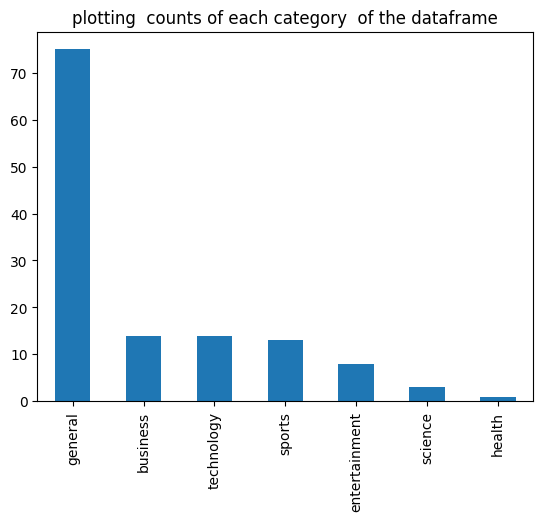

In [27]:
df["category"].value_counts().plot(kind="bar") # plotting  counts of each category  of the dataframe
plt.title("plotting  counts of each category  of the dataframe")

general has the most news against to the others

Text(0.5, 1.0, ' plotting each country  of the dataframe')

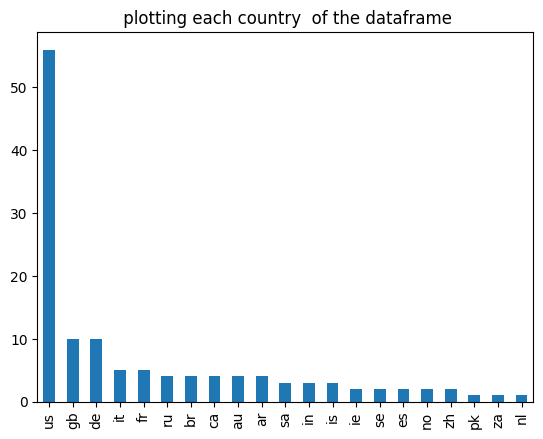

In [28]:

df["country"].value_counts().plot(kind="bar") # plotting each country  of the dataframe
plt.title(" plotting each country  of the dataframe")

Text(0.5, 1.0, ' plotting  each language of the dataframe')

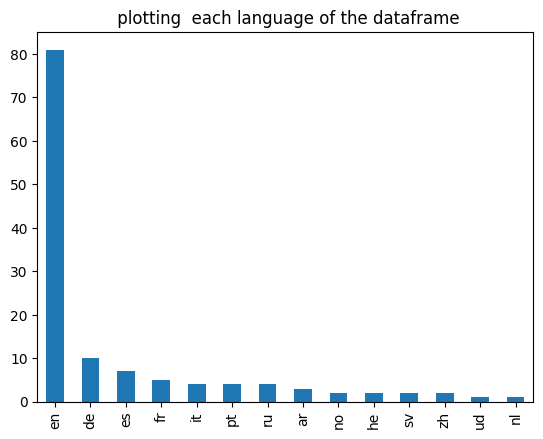

In [29]:
df["language"].value_counts().plot(kind="bar") # plotting  each language of the dataframe
plt.title(" plotting  each language of the dataframe")

Text(0.5, 1.0, ' plotting each country that contains spor news count of description')

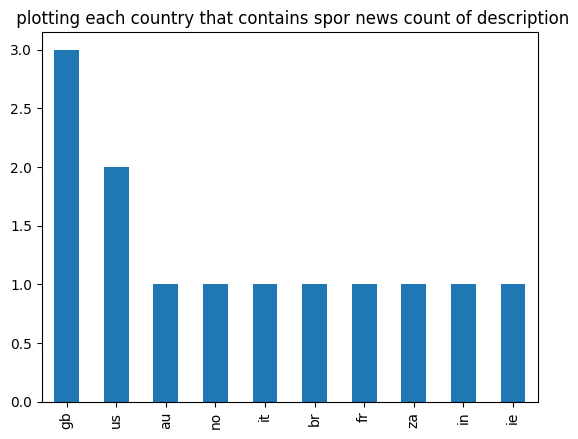

In [30]:
df[df["description"].str.contains("spor")]["country"].value_counts().plot(kind="bar")
plt.title(" plotting each country that contains spor news count of description")

some insights
*   we see that the great britain has the most sport news against to other countries
*   most common language is english and "us" has the most new sites of dataframe



In [31]:
def plotting_most_common_words(language):

  """
  :param:language_type:string indicate
  cleaning desciription and plotting most common words in description feature
  """
  nltk.download('stopwords') # downloading stopword for repated words

  stop_words = set(stopwords.words(language)) #choosing language

  special_chars = set(string.punctuation) # choosing puctuation for pure text

  all_descriptions = " ".join(df['description']) # join all description of dataframe

  words = all_descriptions.lower().split() # convert into lower case for consistency

  filtered_words = [word for word in words if word not in stop_words and word not in special_chars ] # select text

  word_freq = Counter(filtered_words) # count filtered list

  res = word_freq.most_common(20) # add most common 20 words to res

  wc = WordCloud(background_color='white', width=800, height=600) # to plotting use WordCloud
  # plotting
  plt.figure(figsize=(15, 7))
  plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
  plt.axis("off")
  plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


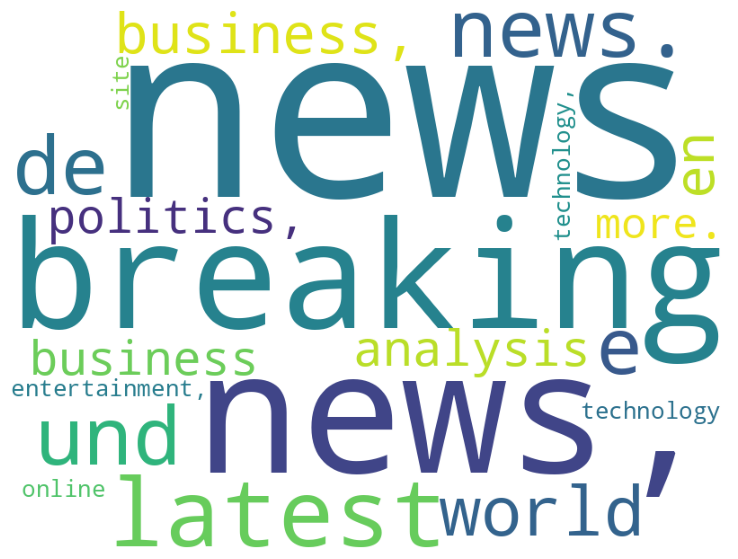

In [32]:
plotting_most_common_words("english")

We see that the most common word is news as we predict :)
Some category names are most common too.

In [33]:
def plot_most_common_words_in_category(category, df):# this method will give you some information about which words are in there category
    """
    :param catgory:string indicate
    :param df:dataframe you have used
    """
    category_df = df[df['category'] == category]
    all_titles = " ".join(category_df['description'])

    stop_words = set(stopwords.words('english'))
    special_chars = set(string.punctuation)

    words = all_titles.lower().split()
    filtered_words = [word for word in words if word not in stop_words and word not in special_chars]

    word_freq = Counter(filtered_words)
    res = word_freq.most_common(20)

    wc = WordCloud(background_color='white', width=800, height=600)

    plt.figure(figsize=(15, 7))
    plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
    plt.axis("off")
    plt.show()
    return res

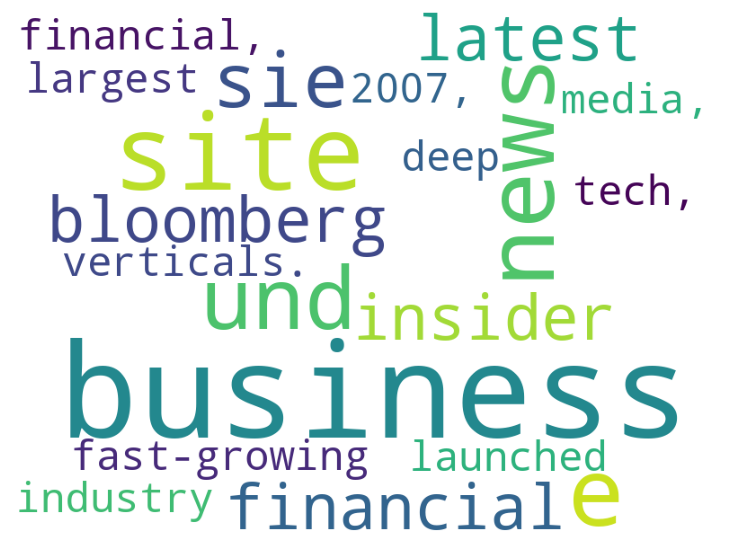

[('business', 10),
 ('site', 6),
 ('news', 5),
 ('e', 5),
 ('und', 4),
 ('sie', 3),
 ('financial', 2),
 ('latest', 2),
 ('bloomberg', 2),
 ('insider', 2),
 ('fast-growing', 2),
 ('deep', 2),
 ('financial,', 2),
 ('media,', 2),
 ('tech,', 2),
 ('industry', 2),
 ('verticals.', 2),
 ('launched', 2),
 ('2007,', 2),
 ('largest', 2)]

In [34]:
plot_most_common_words_in_category("business",df)

Text(0.5, 1.0, 'count of each description')

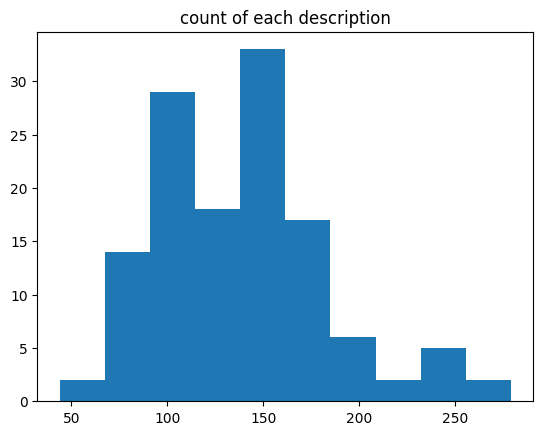

In [47]:
plt.hist(df["description"].str.len()) # count of each description
plt.title("count of each description")

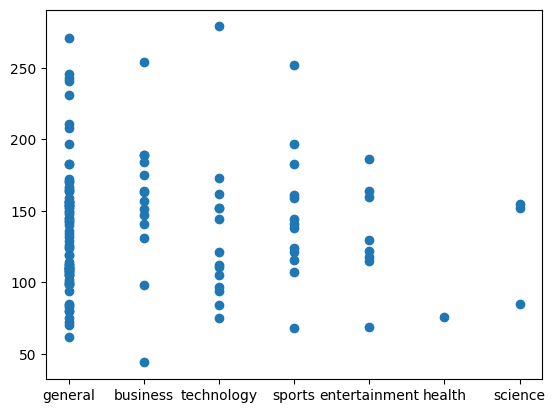

In [68]:
df["new"]=df["description"].str.len() # description count for each category
plt.scatter(y=df["new"],x=df["category"])

# modeling

In [69]:
df["category"].value_counts() # category values are  imbalanced but we can use top 4 categories.

general          75
business         14
technology       14
sports           13
entertainment     8
science           3
health            1
Name: category, dtype: int64

In [70]:
# RandomForestmodel
# I have choosen this model becasue its resistant overfitting imbalanced class
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

df['clean_text'] = df["description"].apply(preprocess_text)

X = df['clean_text']
y = df['category']
# test_size= i have choosen 0.3 for better result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=818)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=818))
])
# fit pipeline
pipeline.fit(X_train, y_train)
# predict test dataset
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))


               precision    recall  f1-score   support

     business       1.00      0.17      0.29         6
entertainment       0.00      0.00      0.00         1
      general       0.81      1.00      0.89        29
       sports       0.00      0.00      0.00         1
   technology       1.00      1.00      1.00         2

     accuracy                           0.82        39
    macro avg       0.56      0.43      0.44        39
 weighted avg       0.80      0.82      0.76        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# These warnings indicate that your classification model struggles to predict or couldn't predict some classes
# we should improve our model or we can increase observation count  too.

In [72]:
# predict with any text
def predict_category(text):
    processed_text = preprocess_text(text)
    predicted_category = pipeline.predict([processed_text])
    return predicted_category[0]


In [73]:
predict_category("busines ,trump,sports")

'general'

In [74]:
predict_category("sports") # acctually model is not too well to predict without general as we see

'general'